#  Stationary Processes

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

## Stochastic Processes
___
A stochastic process is a set of random variables $\{X_t\}_{t \in T}$ indexed for a subset of real numbers $T \subset \mathbb{R}$, for time series purpouses we asume the index set $T = \mathbb{N}$. Since $\{X_t\}$ its a family of random variables teh distribution of $\{X_t\}_{t \in \mathbb{N}}$  its given by:

$$ F_{X_{t1},...,X_{tn}} (x_1,...,x_n) = P[X_{t1}\leq x_1,...,X_{tn}\leq x_n]$$

Functions asociated to a stochastic process $X_t$:

* *Mean function:* $\mu_t = E[X_t]$
* *Variance function:* $\sigma^2_t = E[X_t-\mu_t]^2$
* *Covariance function:* $\gamma(t_1,t_2)=E[(X_{t_1}-\mu_{t_1})(X_{t_2}-\mu_{t_2})]$
* *Correlation function:* $\rho(t_1,t_2)=\frac{\gamma(t_1,t_2)}{\sqrt{\sigma^2_{t_1}}\sqrt{\sigma^2_{t_2}}}$


### Stationary processes

A stochastic process is said to be **strongly stationary** (first order stationary) if the distirbution of the process its T-invariant, i.e., the distribution don't depends of the index set T.

$$ F_{X_{t1},...,X_{tn}} (x_1,...,x_n) = F_{X_{t1+\tau},...,X_{tn+\tau}} (x_1,...,x_n) \qquad \forall \tau \geq 0$$

A stochastic process is said to be **weakly stationary** (second order stationary) if satisfy:
* $E[|X_t|] < \infty$ 
* $E[X_t^2] < \infty$ 
* $E[X_t] = E[X_{t+k}]$ 
* $E[X_t^2] = E[X_{t+k}^2]$ 

**Obervations:** 
* Strong stationarity $\implies$ weakly stationarity
* For a stationarity process the mean and the variace are constants: 
$$E[X_t]=\mu_t=\mu \quad V[X_t]=\sigma^2_t=\sigma^2$$
* For any $t_1, t_2, k \in \mathbb{Z}$, $\gamma(t_1, t_2)=\gamma(t_1+k, t_2+k)$ so $t_1 = t_1+k$ and $t_2 = t_2+k$ lets $t_1-k =t$ and $t_2=t$ then $\gamma(t_1, t_2)=\gamma(t-k,t)=\gamma(t,t+k)=\gamma(k)$ it means that $\gamma$ depends only of the difference k.
* For any $t_1, t_2, k \in \mathbb{Z}$, $\rho(t_1, t_2)=\rho(k)$ it means that $\rho$ depends only of the difference k.

### Functions asociated to a stationary process

Lets $X_t$ a sationary then the following functions asociated to the process are:

* *Autovariance function:* $\gamma(X_t,X_{t+k})=E[(X_{t}-\mu_{t})(X_{t+k}-\mu_{t+k})]=\gamma(k)$
* *Autocorrelation function:* $\rho(X_t,X_{t+k})=\frac{\gamma(X_t,X_{t+k})}{\sqrt{V[X_t]}\sqrt{V[X_{t+k}]}}=\frac{\gamma(k)}{\gamma(0)}$

**Properties**:
* $\gamma(0) = V[X_t]$ and $|\gamma(k)| \leq \gamma(0)$
* $\rho(0)=1$ and $|\rho(k)| \leq 1$
* $\rho(k)=\rho(-k)$ and $\gamma(k)=\gamma(-k)$


**Example: ** White noise process

A white noise $X_t \sim WN(0,\sigma^2)$ its a process such that $t \in \mathbb{R}$:
* $E[X_t]=0 \quad \forall$
* $V[X_t]=\sigma^2 \leq \infty$
* $Cov[X_t,Y_s]=0 \quad t \neq s$

A white noise is said to be gaussian noise if $X_t \sim N(0,\sigma^2)$. Gaussian noise process simulation

In [1]:
run tsUtils.py

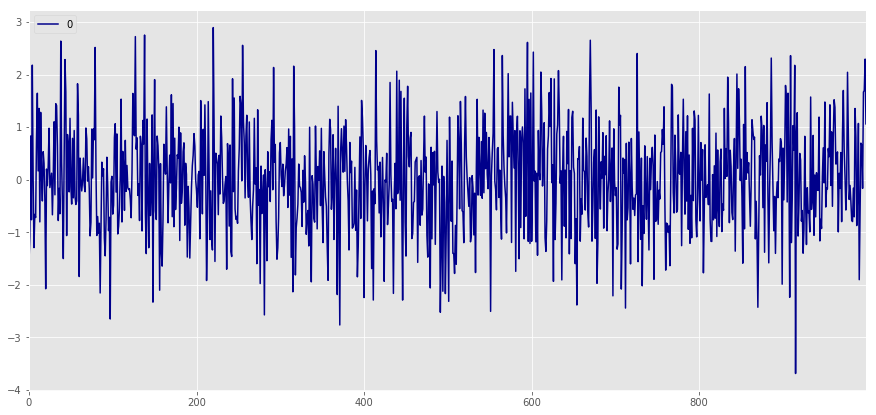

In [2]:
%matplotlib inline
import numpy as np
plt.style.use('ggplot')
num_samples = 1000
plotTimeSeries(pd.DataFrame(np.random.normal(0,1,size=num_samples)))

## Box Cox Transformation for Variance Stabilizing
___

Sometimes there are process $X_t$ who variance depends of t in form of deterministic function of the mean, that implies that the process $X_t$ are stationary in the mean but not are stationary in the variance. 

$$V[X_t]= c f(\mu_t)$$

Lets define a transformation $T$ such that the transformed process $T(X_t)$ has constant variance $c$. Lets suposse the desired function $f(\mu_t)$ has and Taylor series aproximation about the point $\mu_t$ i.e.

$$
\begin{align*}
T(X_t) &\approx T(\mu_t) + T'(\mu_t)(X_t - \mu_t)\\
V[T(X_t)] &= V[T(\mu_t) + T'(\mu_t)(X_t - \mu_t)]\\
 &= V[T'(\mu_t)(X_t - \mu_t)]\\
 &= (T'(\mu_t))^2V[X_t - \mu_t]\\
 &= (T'(\mu_t))^2V[X_t]\\
V[T(X_t)] &= T'(\mu_t)^2 (c f(\mu_t))\\
c &=  c (T'(\mu_t))^2  f(\mu_t)\\
1 &=  T'(\mu_t)^2  f(\mu_t)\\
T'(\mu_t) &=  \frac{1}{\sqrt{f(\mu_t)}}\\
\int T'(\mu_t) &= \int \frac{d \mu_t}{\sqrt{f(\mu_t)}}\\
T(\mu_t) &= \int \frac{d \mu_t}{\sqrt{f(\mu_t)}}\\
\end{align*}
$$

Box and Cox introduced the following function, if $V[X_t] = c \mu_t^{2(\lambda-1)}$ then:

$$
\begin{align*}
T(\mu_t) &= \int \frac{d \mu_t}{\mu_t^{\lambda-1}}\\
T(X_t) &= \frac{X_t^\lambda-1}{\lambda} \quad if \quad \lambda \neq 0\\
T(X_t) &= Ln(X_t) \quad if \quad \lambda = 0\\
\end{align*}
$$

The solution of this integral provides many different transformations. One of the advantages of use this transformation is that the choosing of $\lambda$ could be obtained from the data following the next algorithm:

1) Select a rank ordered of lambda values $[\lambda_0,...,\lambda_m]$

2) Compute the geometric mean:
$$\tilde{X_t}=\left( \prod_{t=1}^n X_t \right)^{1/n}$$

3) For each $\lambda_i \in [\lambda_0,...,\lambda_m]$ compute: 
$$X_t^{(\lambda_i)}=\frac{X_t^{\lambda_i}-1}{\lambda_i  \tilde{X_t}^{\lambda_I-1}}$$

4) Calculate the statistical residuals and select the $\lambda_i$ whose likelihood is the highest under the hypothesis of normality on $X_t^{(0)}=Ln(X_t)\tilde{X_t}$

**Example**: Airline Passengers

A simple exploration cheking the plot of the data series, show there is a lack of stationarity in the variance about the mean.

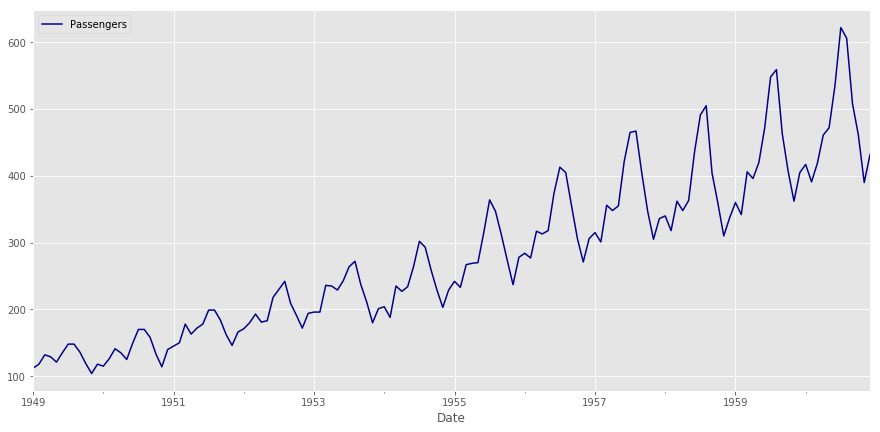

In [3]:
AirlinePassengersDF = pd.read_csv('DataSets/AirlinePassengers.csv')
AirlinePassengersDF['Date'] = pd.to_datetime(AirlinePassengersDF['Date'],format='%Y/%m')
AirlinePassengersDF = AirlinePassengersDF.set_index('Date')
plt.style.use('ggplot')
plotTimeSeries(AirlinePassengersDF)

lambda value: 0.14802256545


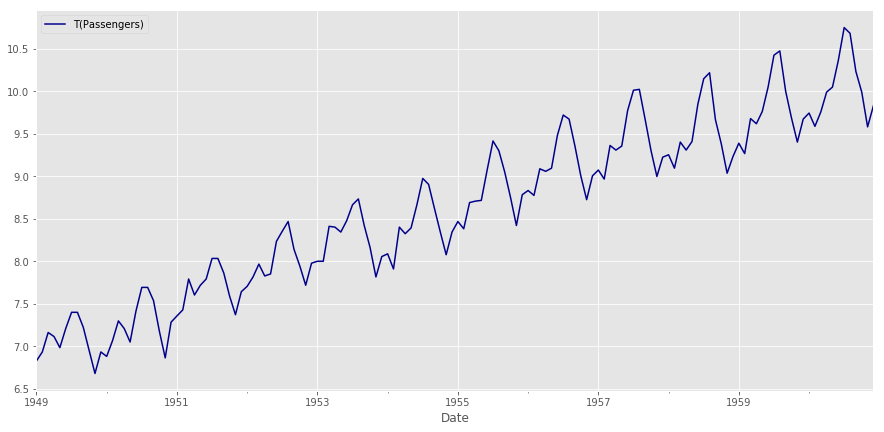

In [4]:
from scipy.stats import boxcox
plt.style.use('ggplot')
AirlinePassengersDF['T(Passengers)'], lmbda = boxcox(AirlinePassengersDF['Passengers'])
print('lambda value: '+str(lmbda))
plotTimeSeries(AirlinePassengersDF[['T(Passengers)']])

**Remarks about BoxCox transformations**

The Box-Cox power transformation is not a guarantee for normality. This is because it actually does not really check for normality; the method checks for the smallest standard deviation. The assumption is that among all transformations with Lambda values between -5 and +5, transformed data has the highest likelihood – but not a guarantee – to be normally distributed when standard deviation is the smallest. Therefore, it is absolutely necessary to always check the transformed data for normality using a probability plot.

Additionally, the Box-Cox Power transformation only works if all the data is positive and greater than 0. This, however, can usually be achieved easily by adding a constant to all data such that it all becomes positive before it is transformed.


## Backshift and difference operators
___

Lets $X_t$ a stochastic process: 
* The the backshift (Lag) operator B is defined as $B(X_t) = X_{t-1}$ so that $B^k(X_t)=X_{t-k}=(X_t)B^k$
* The difference operator $\nabla$ is defined as $\nabla(X_t)=X_t-X_{t-1}$

**Properties** Lets $X_t$, $Y_t$ processes and $\alpha \in \mathbb{R}$ then:
* B its a linear operator. $B(X_t+\alpha Y_t) = B(X_t)+\alpha B(Y_t)$
* $\nabla$ its a linear operator. $\nabla(X_t+\alpha Y_t) = \nabla(X_t)+\alpha \nabla(Y_t)$

From the last definitions its possible derive the concept of lag polinomials, so that if $\alpha_1,...,\alpha_k \in \mathbb{R}$ the lag polinomial asociated to the process 

$$
\begin{align*}
\alpha_1 X_t+\alpha_2 X_{t-2}+...+\alpha_k X_{t-k} &= (\alpha_1+\alpha_2B^2+...+\alpha_k B^k) X_t \\
& = \left(\sum_{i=0}^k B^k\right) X_t \\
& = p(B) X_t \\
\end{align*}
$$

**Theorem**: Lets $X_t$ a stochastic process then $\nabla^k X_t = X_t-X_{t-k} = \sum_{i=0}^k {{k}\choose{i}}  (-B)^k X_t$

Note that $\nabla(X_t)=X_t-X_{t-1} = X_t-B X_{t} = (1-B) X_t$